In [5]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
from keras.datasets import cifar10

In [7]:
(xtrain , ytrain) , (xtest , ytest) = cifar10.load_data()

In [8]:
xtrain.shape

(50000, 32, 32, 3)

In [9]:
xtest.shape

(10000, 32, 32, 3)

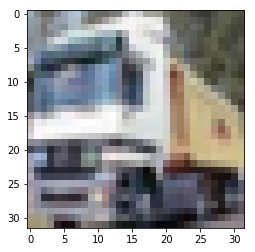

In [10]:
plt.imshow(xtrain[1])

In [11]:
xtrain = (xtrain.astype('float32'))/255.0

xtest = (xtest.astype('float32'))/255.0

In [12]:
xtrain.shape

(50000, 32, 32, 3)

In [10]:
xtrain[1]

array([[[0.6039216 , 0.69411767, 0.73333335],
        [0.49411765, 0.5372549 , 0.53333336],
        [0.4117647 , 0.40784314, 0.37254903],
        ...,
        [0.35686275, 0.37254903, 0.2784314 ],
        [0.34117648, 0.3529412 , 0.2784314 ],
        [0.30980393, 0.31764707, 0.27450982]],

       [[0.54901963, 0.627451  , 0.6627451 ],
        [0.5686275 , 0.6       , 0.6039216 ],
        [0.49019608, 0.49019608, 0.4627451 ],
        ...,
        [0.3764706 , 0.3882353 , 0.30588236],
        [0.3019608 , 0.3137255 , 0.24313726],
        [0.2784314 , 0.28627452, 0.23921569]],

       [[0.54901963, 0.60784316, 0.6431373 ],
        [0.54509807, 0.57254905, 0.58431375],
        [0.4509804 , 0.4509804 , 0.4392157 ],
        ...,
        [0.30980393, 0.32156864, 0.2509804 ],
        [0.26666668, 0.27450982, 0.21568628],
        [0.2627451 , 0.27058825, 0.21568628]],

       ...,

       [[0.6862745 , 0.654902  , 0.6509804 ],
        [0.6117647 , 0.6039216 , 0.627451  ],
        [0.6039216 , 0

In [11]:
from keras.utils.np_utils import to_categorical

In [12]:
ytest_cat = to_categorical(ytest)

In [13]:
ytrain_cat = to_categorical(ytrain)

In [14]:
ytest.shape


(10000, 1)

In [15]:
ytest_cat.shape

(10000, 10)

In [16]:
ytrain[1]

array([9], dtype=uint8)

In [17]:
ytrain_cat[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [3]:
from keras.models import Sequential

from keras.layers import Conv2D , Dense , Flatten ,MaxPool2D , Activation ,

import keras.backend as K

Using TensorFlow backend.


In [4]:
K.clear_session()

model = Sequential()

#layer1

model.add(Conv2D(32 ,(3,3) , padding = 'same' , input_shape = (32,32,3) ,activation ='relu'))

model.add(Conv2D(32,(3,3),activation = 'relu'))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(Dropout(0.2))

#layer2 

model.add(Conv2D(64 , (3,3),padding = 'same', activation = 'relu'))

model.add(Conv2D(64 , (3,3) ,activation = 'relu'))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(Dropout(0.2))

#layer3

model.add(Conv2D(128 , (3,3),padding = 'same', activation = 'relu'))

model.add(Conv2D(128, (3,3) ,activation = 'relu'))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(Dropout(0.2))

#layer3 flatten

model.add(Flatten())

#layer4 Dense

model.add(Dense(512 ,activation = 'relu'))

model.add(Dense(10, activation = 'softmax'))


NameError: name 'Dropout' is not defined

In [18]:
model.compile(loss = 'categorical_crossentropy',optimizer ='rmsprop' , metrics = ['accuracy'])

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 6, 6, 128)         73856     
__________

In [21]:
sa = model.fit(xtrain , ytrain_cat , batch_size = 128 , epochs = 15 , verbose = 1 ,validation_split = 0.3)

Train on 35000 samples, validate on 15000 samples
Epoch 1/15
35000/35000 [==============================] - 277s 8ms/step - loss: 0.6781 - acc: 0.7691 - val_loss: 0.7834 - val_acc: 0.7415
Epoch 2/15
35000/35000 [==============================] - 276s 8ms/step - loss: 0.6017 - acc: 0.7916 - val_loss: 0.9539 - val_acc: 0.6967
Epoch 3/15
35000/35000 [==============================] - 275s 8ms/step - loss: 0.5435 - acc: 0.8117 - val_loss: 0.8247 - val_acc: 0.7411
Epoch 4/15
35000/35000 [==============================] - 278s 8ms/step - loss: 0.4933 - acc: 0.8313 - val_loss: 0.8236 - val_acc: 0.7615
Epoch 5/15
35000/35000 [==============================] - 276s 8ms/step - loss: 0.4521 - acc: 0.8441 - val_loss: 0.8607 - val_acc: 0.7482
Epoch 6/15
35000/35000 [==============================] - 277s 8ms/step - loss: 0.4141 - acc: 0.8563 - val_loss: 0.9288 - val_acc: 0.7449
Epoch 7/15
35000/35000 [==============================] - 257s 7ms/step - loss: 0.3807 - acc: 0.8670 - val_loss: 0.8885 - 

In [1]:
test_accuracy = model.evaluate(x_test, y_test_cat)[1]
test_accuracy

NameError: name 'model' is not defined